In [1]:
import json
import pandas as pd
from pandas import json_normalize
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
raw_data = open('../DemoSampleData.json', "r")
rbm_json_data = json.loads(raw_data.read())
rbm_df = json_normalize(rbm_json_data)
rbm_df.head()

GENERIC_PERSONA_FILTER_SK  SECTOR  THERAPEUTIC_AREA_SK  \
0                       1117  Pharma                    6   
1                       1118  Pharma                    6   
2                       1119  Pharma                    6   
3                       1120  Pharma                    6   
4                       1121  Pharma                    6   

  THERAPEUTIC_AREA_CODE  COMPOUND_SK COMPOUND_CODE  INDICATION_SK  \
0              Oncology            1      54767414              1   
1              Oncology            1      54767414              1   
2              Oncology            1      54767414              1   
3              Oncology            1      54767414              1   
4              Oncology            1      54767414              1   

                INDICATION_ID                        TA_INDICATION  \
0  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
1  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
2  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
3  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
4  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   

   STUDY_PHASE_SK  ... COUNT_OF_SITES  ACCELERATED_VALUE SNAPSHOT_DATE_SK  \
0               7  ...              1      Required (LD)                7   
1               7  ...             30      Required (LD)                7   
2               7  ...             30      Required (LD)                7   
3               7  ...             30      Required (LD)                7   
4               7  ...             30      Required (LD)                7   

  TRENDING_COUNTRY_PROFILE_SCORE  RAG_COUNTRY_PROFILE_SCORE  \
0                            NaN                        NaN   
1                      NO_CHANGE                      GREEN   
2                      NO_CHANGE                      GREEN   
3                      NO_CHANGE                      GREEN   
4                      NO_CHANGE                      GREEN   

  TRENDING_SITE_PROFILE_SCORE TRENDING_STUDY_PROFILE_SCORE  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3                        HIGH                    NO_CHANGE   
4                         NaN                          NaN   

  RAG_SITE_PROFILE_SCORE  RAG_STUDY_PROFILE_SCORE COUNTRY_MGMT_CRO  
0                    NaN                      NaN              NaN  
1                    NaN                      NaN              NaN  
2                    NaN                      NaN              NaN  
3                  GREEN                    AMBER              NaN  
4                    NaN                      NaN              NaN  

[5 rows x 54 columns]

In [8]:
rbm_df.shape

(186, 54)

In [9]:
rbm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   GENERIC_PERSONA_FILTER_SK       186 non-null    int64 
 1   SECTOR                          186 non-null    object
 2   THERAPEUTIC_AREA_SK             186 non-null    int64 
 3   THERAPEUTIC_AREA_CODE           186 non-null    object
 4   COMPOUND_SK                     186 non-null    int64 
 5   COMPOUND_CODE                   186 non-null    object
 6   INDICATION_SK                   186 non-null    int64 
 7   INDICATION_ID                   186 non-null    object
 8   TA_INDICATION                   186 non-null    object
 9   STUDY_PHASE_SK                  186 non-null    int64 
 10  STUDY_PHASE_NAME                186 non-null    object
 11  CLINICAL_STUDY_SK               186 non-null    int64 
 12  CLINICAL_STUDY_IDENTIFIER       186 non-null    ob

In [10]:
rbm_df['CLINICAL_STUDY_IDENTIFIER'].value_counts()

TCS1003    70
TCS1001    62
TCS1002    54
Name: CLINICAL_STUDY_IDENTIFIER, dtype: int64

<AxesSubplot:>

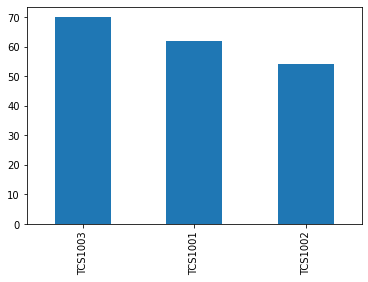

In [18]:
rbm_df['CLINICAL_STUDY_IDENTIFIER'].value_counts().plot(kind='bar')

In [13]:
rbm_df['SITE_STATUS'].value_counts()

Execution       62
Not Selected    36
Completed       28
Closed          20
Cancelled       20
Open            15
Planned          3
Preparation      2
Name: SITE_STATUS, dtype: int64

In [14]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['SITE_STATUS'].value_counts()

Completed       21
Execution       13
Open            10
Closed           9
Not Selected     6
Cancelled        3
Name: SITE_STATUS, dtype: int64

<AxesSubplot:ylabel='SITE_STATUS'>

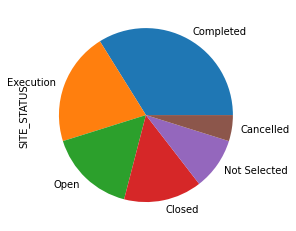

In [16]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['SITE_STATUS'].value_counts().plot(kind='pie')

In [17]:
for study in rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique():
    print(study)
    print(rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['SITE_STATUS'].value_counts())
    print('--------------------')

TCS1001
Completed       21
Execution       13
Open            10
Closed           9
Not Selected     6
Cancelled        3
Name: SITE_STATUS, dtype: int64
--------------------
TCS1002
Execution       22
Closed          11
Cancelled        9
Completed        7
Not Selected     5
Name: SITE_STATUS, dtype: int64
--------------------
TCS1003
Execution       27
Not Selected    25
Cancelled        8
Open             5
Planned          3
Preparation      2
Name: SITE_STATUS, dtype: int64
--------------------


In [11]:
rbm_df['GLOBAL_REGION'].value_counts()

North America    117
EMEA              66
Asia Pacific       3
Name: GLOBAL_REGION, dtype: int64

<AxesSubplot:ylabel='GLOBAL_REGION'>

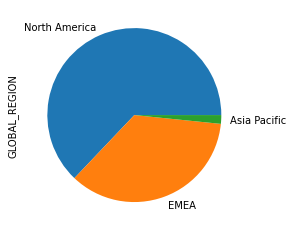

In [19]:
rbm_df['GLOBAL_REGION'].value_counts().plot(kind='pie')

In [12]:
rbm_df['REGION_COUNTRY'].value_counts()

North America-United States of America (the)                       117
EMEA-United Kingdom of Great Britain and Northern Ireland (the)     15
EMEA-France                                                         12
EMEA-Spain                                                          10
EMEA-Germany                                                        10
EMEA-Netherlands (the)                                               5
EMEA-Belgium                                                         5
EMEA-Italy                                                           4
EMEA-Israel                                                          3
Asia Pacific-Singapore                                               3
EMEA-Sweden                                                          1
EMEA-Saudi Arabia                                                    1
Name: REGION_COUNTRY, dtype: int64